In [1]:
from presto_mod.pulsed import pulse_test as pt
from presto_mod.pulsed import pulsed_test_with_probe as ptpr

import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import time
import pyvisa

import os
Global_data_adress = r"F:\ColdMeasurements\NanoY\Data"
exp_name = 'Pulsed_measurements_T1_corr'
file_folder = Global_data_adress+'\\'+exp_name
if not os.path.exists(file_folder):
  os.mkdir(file_folder)
  print("Folder %s created!" % file_folder)
else:
  print("Folder %s already exists" % file_folder)

Folder F:\ColdMeasurements\NanoY\Data\Pulsed_measurements_T1_corr already exists


In [2]:
presto_address = "169.254.3.14"  # your Presto IP address

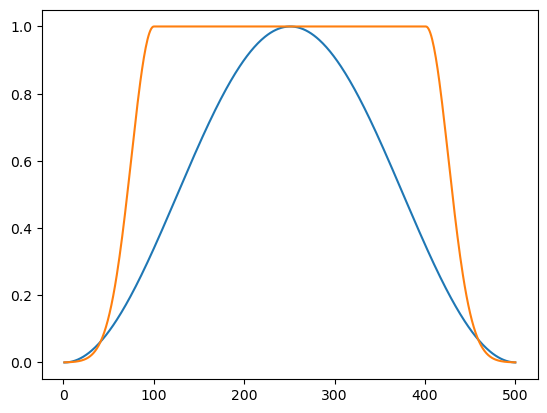

In [3]:
nr_samples = 500
edge = 10
t = np.linspace(1,nr_samples,nr_samples)

def gate(t, start, stop):
    return np.heaviside(t-start, 1) - np.heaviside(t-stop, 1)

def gaussian(t, cent, sig, start, end):
    Result = np.zeros(int(t[-1]))
    Result[start:end] = np.exp(-np.power((t[start:end] - cent) / sig, 2.0) / 2)
    return Result
    
# def sin2(nr_of_samples, start=0, stop=9, sig_feft=2, sig_right=0.001): 
#     t = np.linspace(0, 10, number_of_samples)
#     return gate(t, start, stop) + gaussian(t, cent=start, sig=sig_feft)*(1-np.heaviside(t-start, 1)) + gaussian(t, cent=stop, sig=sig_right)*(np.heaviside(t-stop, 1))

def Gauss(nr_samples,drag,edge=100,sig_left=25,sig_right=25):
    t = np.linspace(1, nr_samples, nr_samples, endpoint=True)
    Left = gaussian(t, edge, sig_left, 0, edge)
    Middle = gate(t, edge+1, t[-edge])
    Right = gaussian(t, int(t[-edge]), sig_right,int(t[-edge-1]),int(t[-1]))
    return Left + Middle + Right

def sin2(nr_samples: int, drag: float = 0.0) -> np.ndarray:
    x = np.linspace(0.0, 1.0, nr_samples, endpoint=False)
    return np.sin(np.pi * x) ** 2

plt.plot(t, sin2(nr_samples))
plt.plot(t, Gauss(nr_samples,0))
# print(Gauss(nr_samples,edge,1,1))
# print(nr_samples)

In [18]:
print(datetime.now())

omega2 = 5.768314e9*2
lo_freq = (omega2 - 0.436e9)/2
if_freq  = omega2-lo_freq
Readout_freq = 5.768314e9
print(lo_freq)
print(if_freq)
print(Readout_freq)

delay = 400e-9
LO_duration=2000e-9
IF_duration=1400e-9
PR_duration = 2000e-9
Readout_duration = delay*4+PR_duration

experiment = ptpr.T1(
        LO_port=3, # LO
        IF_port=1, # IF
        PR_port=8,  # Probe
        readout_port1=7,  # TWPA 2
        readout_port2=8,  # TWPA 1
        file_folder = file_folder,
        file_name = 'Pulse_test_pulse_duration',
        
        LO_freq=lo_freq,
        LO_amp=0.0/np.sqrt(2),
        LO_duration=LO_duration,
        
        IF_freq=if_freq,
        IF_amp = 0.0/2,
        IF_duration=IF_duration,             # pulse duration

        PR_freq = Readout_freq,
        PR_amp = 0.1,
        PR_duration = PR_duration, 

        readout_freq=Readout_freq,
        
        readout_duration=Readout_duration,
        delay=delay,
        
        wait_delay=50e-6,
        readout_delay=200e-9,
        num_repeats=1, 
        num_averages=100000,
        envelope_function = Gauss, 
    
    )

2024-11-26 18:09:47.570473
5550314000.0
5986314000.0
5768314000.0
1400


In [19]:
att_list = experiment.run(presto_address)

Run finished


In [20]:
data = att_list['data'][0]
data.shape

(2, 3600)

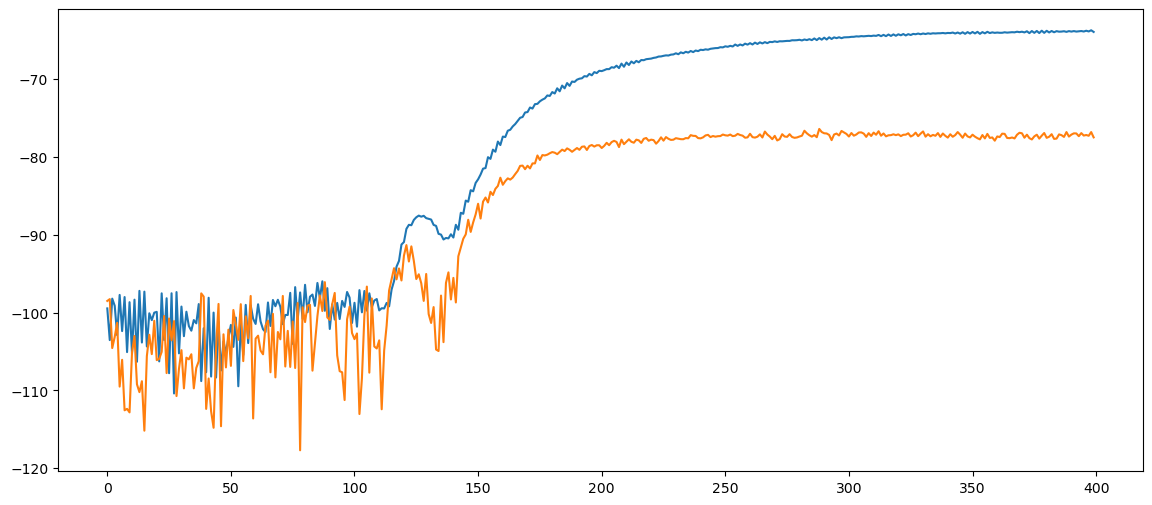

In [21]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(20*np.log10(np.abs(data[0]))[:400])
ax.plot(20*np.log10(np.abs(data[1]))[:400])

# Perform multiple temporal sweeps with same conditions

In [11]:
print(datetime.now())

omega2 = 5.768314e9*2
lo_freq = (omega2 - 0.436e9)/2
if_freq  = omega2-lo_freq
Readout_freq = 5.768314e9
print(lo_freq)
print(if_freq)
print(Readout_freq)

delay = 100e-9
LO_duration=4600e-9
IF_duration=4000e-9
PR_duration = 4600e-9
Readout_duration = delay*4+PR_duration

experiment = ptpr.T1(
        LO_port=3, # LO
        IF_port=1, # IF
        PR_port=8,  # Probe
        readout_port1=7,  # TWPA 2
        readout_port2=8,  # TWPA 1
        file_folder = file_folder,
        file_name = 'Pulse_test_pulse_duration',
        
        LO_freq=lo_freq,
        LO_amp=0.0/np.sqrt(2),
        LO_duration=LO_duration,
        
        IF_freq=if_freq,
        IF_amp = 0.0/2,
        IF_duration=IF_duration,             # pulse duration

        PR_freq = Readout_freq,
        PR_amp = 0.1,
        PR_duration = PR_duration, 

        readout_freq=Readout_freq,
        
        readout_duration=Readout_duration,
        delay=delay,
        
        wait_delay=100e-6,
        readout_delay=200e-9,
        num_repeats=1000, 
        num_averages=10000,
        envelope_function = Gauss, 
    
    )

2024-11-26 15:52:14.005492
5550314000.0
5986314000.0
5768314000.0


In [12]:
att_list = experiment.run(presto_address)
data = att_list['data']
data.shape

Run finished


In [19]:
TWPA1 = data[:,0,:]
TWPA2 = data[:,0,:]
TWPA1.shape

(100, 5000)

Text(0.5, 0, 'duration, ns')

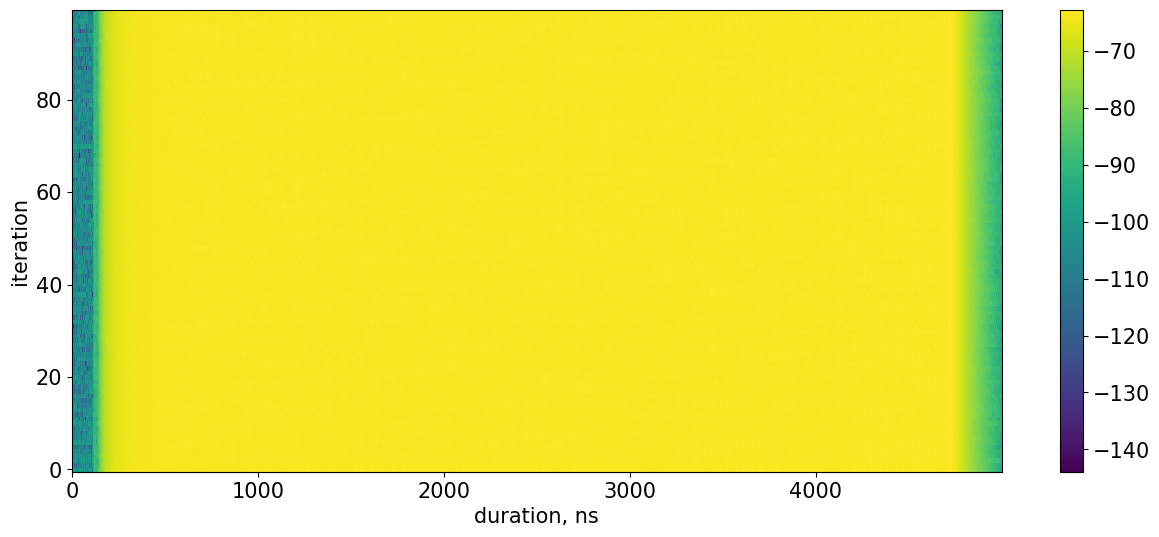

In [96]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))

TWPA1_db= 20*np.log10(np.abs(TWPA1))

TWPA1_db_cut = TWPA1_db

duration = np.arange(len(TWPA1_db_cut[0]))
itera = np.arange(len(TWPA1_db_cut))

c = ax.pcolor(duration, itera, TWPA1_db_cut, cmap = 'viridis')
fig.colorbar(c, ax=ax)
ax.set_ylabel('iteration')
ax.set_xlabel('duration, ns')

Text(0.5, 0, 'delay, ns')

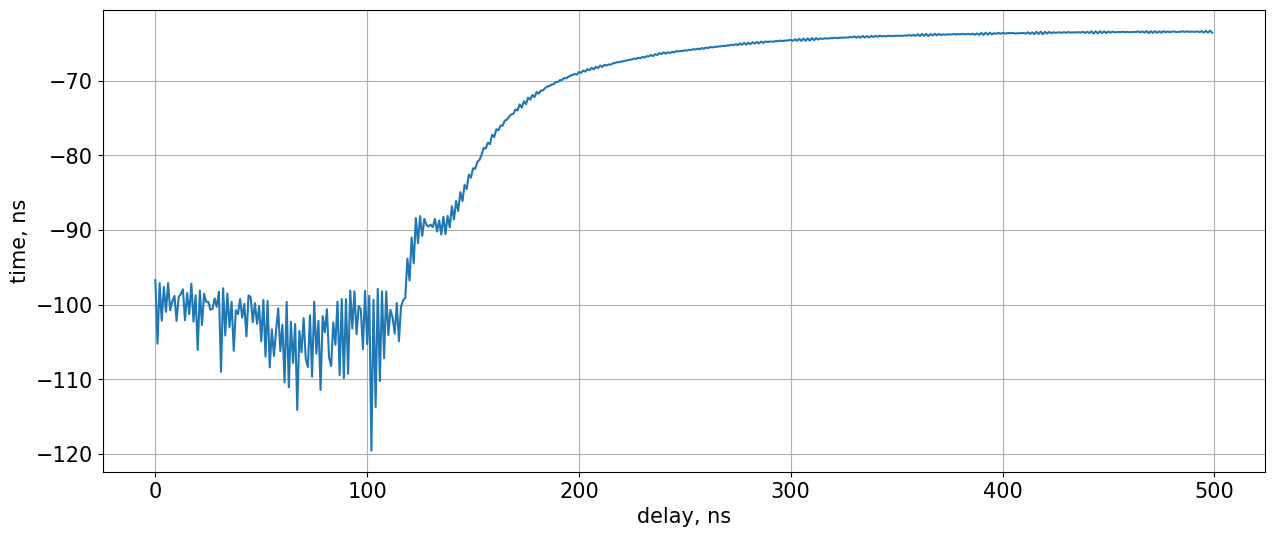

In [102]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))
c = ax.plot(TWPA1_db[10,:500])
ax.grid()
ax.set_ylabel('time, ns')
ax.set_xlabel('delay, ns')

Text(0.5, 0, 'delay, ns')

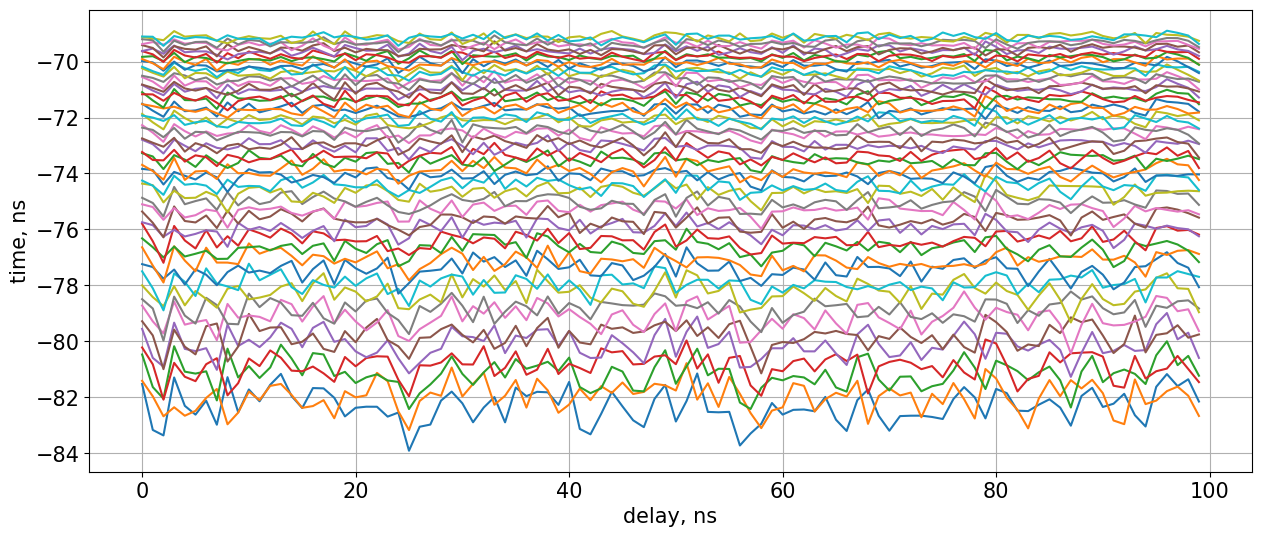

In [98]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))
c = ax.plot(TWPA1_db[:,150:200])
ax.grid()
ax.set_ylabel('time, ns')
ax.set_xlabel('delay, ns')

Text(0.5, 0, 'delay, ns')

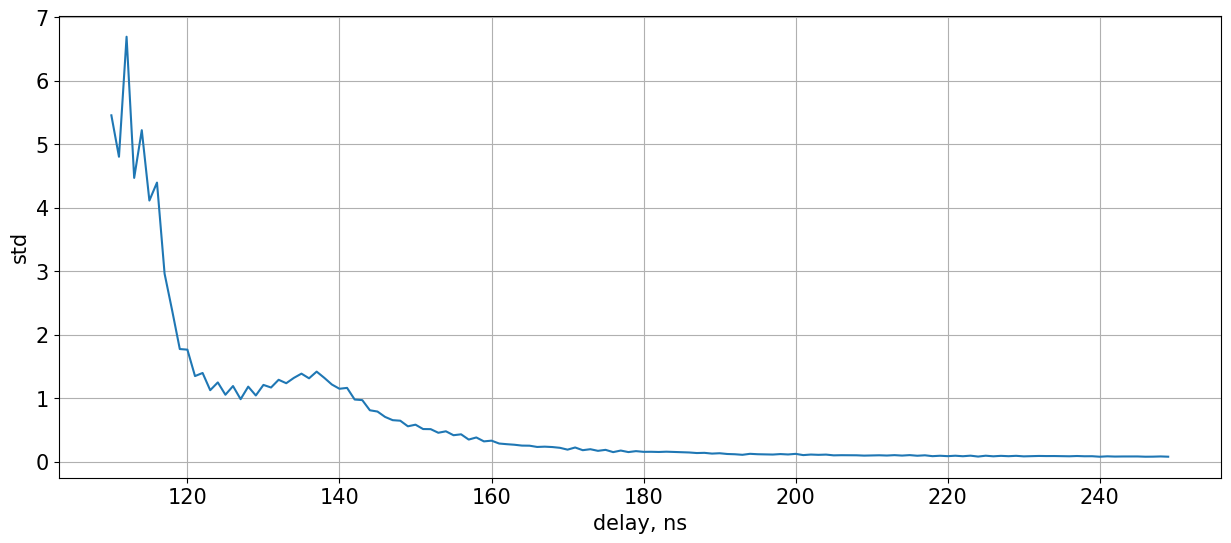

In [104]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15,6))
c = ax.plot(duration[110:250], np.std(TWPA1_db.T, axis = 1)[110:250])
ax.grid()
ax.set_ylabel('std')
ax.set_xlabel('delay, ns')